# Assignment 1: Hands on Machine Learning

## Imports

In [1]:
# Array Manipulation
import numpy as np

# Dataframes (Table-like structure)
import pandas as pd

# Visualisaion Tools
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# ML - More Powerful Models
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### 1. Load Data

In [2]:
diamonds = pd.read_csv('diamonds.csv')
# For development, we might be wise to use a scaled-down size of dataset since it is large
#diamonds = diamonds.sample(500)

In [3]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


> Look at the 1st column. What is wrong with it?

In [4]:
diamonds = diamonds.drop(columns=['Unnamed: 0'])

In [5]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 2. Explore Data

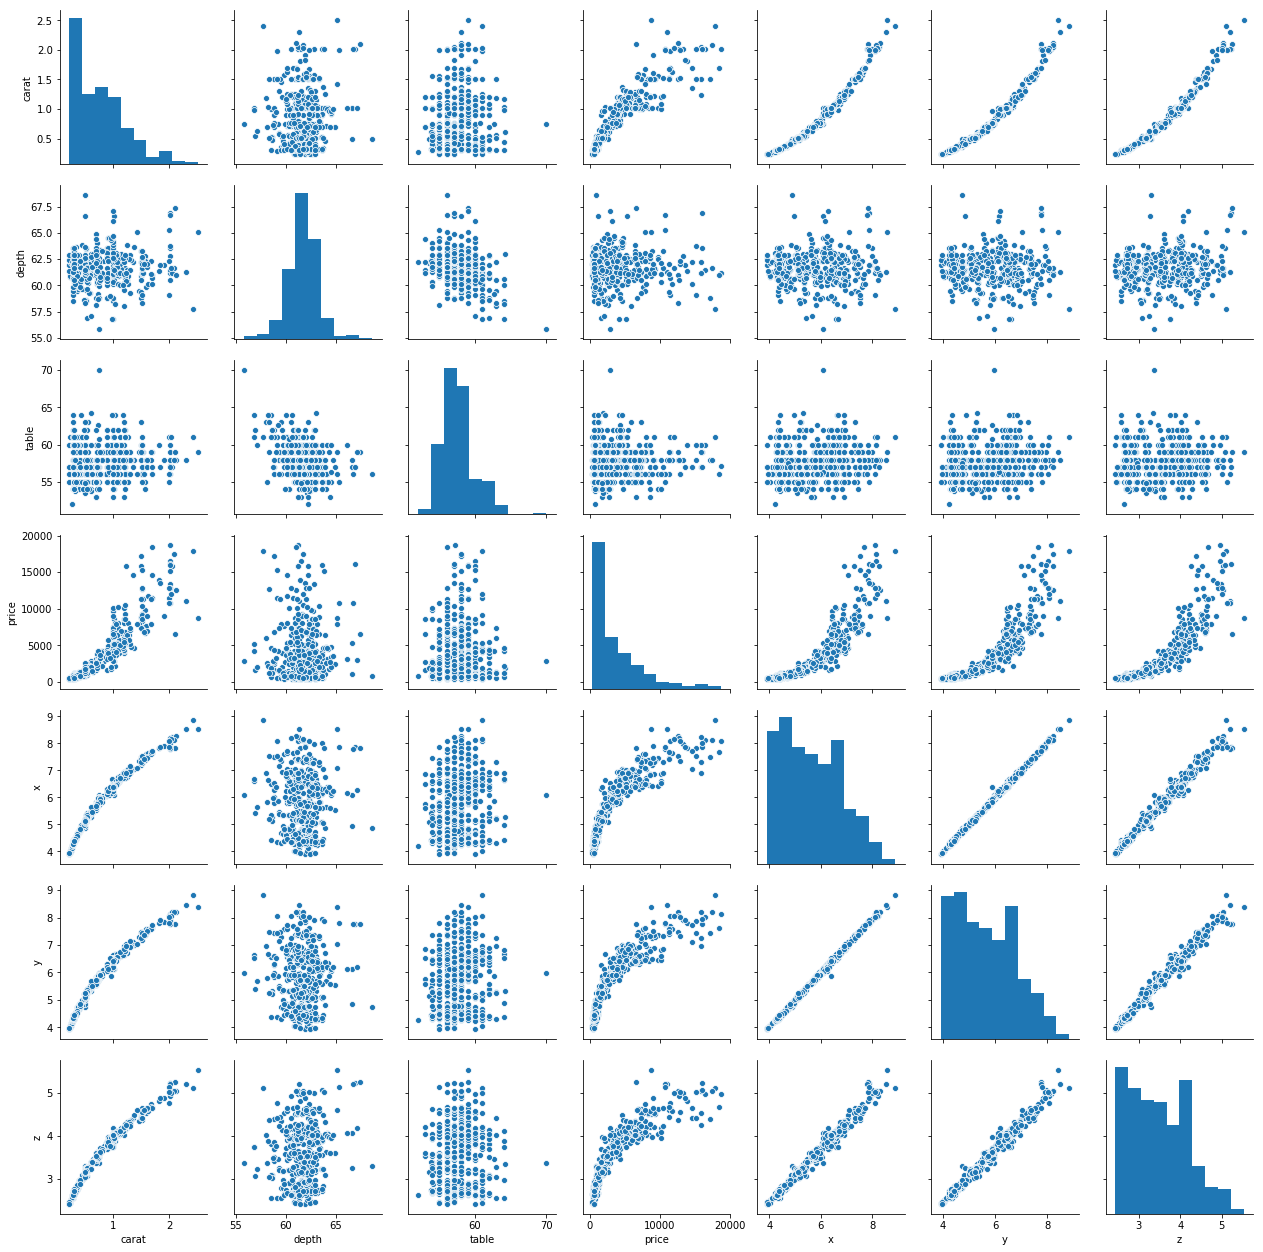

In [6]:
sns.pairplot(diamonds.sample(n=500, random_state=0))  # Sample 500

### 3. Machine Learning

#### A. Relationship between carat and price


In [7]:
carat = diamonds[['carat']]
price = diamonds['price']

##### A1. Split Test Train

In [8]:
carat_train, carat_test, price_train, price_test = train_test_split(
    carat, price,
    test_size=0.3,
    shuffle=True,
    random_state=0)

##### A2. Train the Model

In [9]:
model = LinearRegression()
model.fit(carat_train, price_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### A3. Evaluate the Model

In [10]:
pred_train = model.predict(carat_train)
pred_test = model.predict(carat_test)

###### A3.1 Mean Squared Error

In [11]:
mse_train = mean_squared_error(pred_train, price_train)
mse_test = mean_squared_error(pred_test, price_test)
print(f'Train Set MSE: {mse_train}')
print(f'Test Set MSE: {mse_test}')

Train Set MSE: 2408781.0823722878
Test Set MSE: 2372901.2792871613


###### A3.1 R2 Score

In [12]:
r2_train = r2_score(pred_train, price_train)
r2_test = r2_score(pred_test, price_test)
print(f'Train Set r2 Score: {r2_train}')
print(f'Test Set r2 Score: {r2_test}')

Train Set r2 Score: 0.8216145781164257
Test Set r2 Score: 0.8225952605325587


##### A4. Visualisation

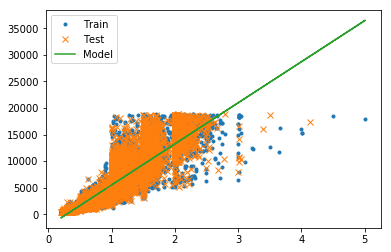

In [13]:
plt.plot(carat_train, price_train, '.', label='Train')
plt.plot(carat_test, price_test, 'x', label='Test')
plt.plot(carat_train, pred_train, label='Model')

plt.legend()

##### A5. Learning Curves

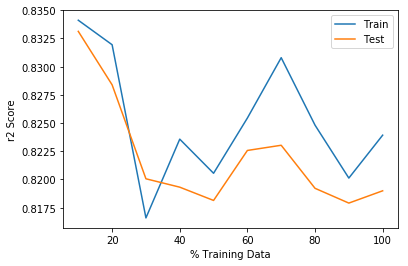

Final train r2 score: 0.8239178258456317
Final test r2 score: 0.8189848291249694


In [14]:
def plot_learning_curves(model, X, y, test_size=0.3, random_state=0):
    train_scores = []
    test_scores = []
    percentages = np.linspace(10, 100, 10) # Range from 10 to 100 with 10 intervals
    for percent in percentages:
        # Get Samples
        size = int(len(y) * percent / 100)
        indicies = np.random.choice(len(y), size)
        X_set = X.iloc[indicies]
        y_set = y.iloc[indicies]

        # 1. Split Test Train
        X_train, X_test, y_train, y_test = train_test_split(
            X_set, y_set,
            test_size=test_size,
            shuffle=True,
            random_state=random_state
        )

        # 2. Train the Model
        model.fit(X_train, y_train)
        
        # 3. Evaluate our Model
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
        
        # 3.1. r2 Score
        r2_train = r2_score(pred_train, y_train)
        r2_test = r2_score(pred_test, y_test)
        
        train_scores.append(r2_train)
        test_scores.append(r2_test)
    
    plt.plot(percentages, train_scores, label='Train')
    plt.plot(percentages, test_scores, label='Test')
    
    plt.xlabel('% Training Data')
    plt.ylabel('r2 Score')
    plt.legend()
    
    plt.show()
    print('Final train r2 score:', train_scores[-1])
    print('Final test r2 score:', test_scores[-1])
    
plot_learning_curves(LinearRegression(), carat, price)

### B. Combining Everything

#### OneHotEncoding

In [15]:
def one_hot_encode(df, column_names):
    enc = OneHotEncoder()
    encoded_df = pd.DataFrame(enc.fit_transform(df[column_names]).toarray())
    encoded_df.columns = enc.categories_[0].tolist()
    encoded_df = encoded_df.add_prefix('_'.join(column_names) + ' ')
    encoded_df.set_index(df.index, inplace=True)
    
    return df.drop(columns=column_names).join(encoded_df)
    #combined_df = pd.concat([df, encoded_df], axis=1, ignore_index=True)
    #combined_df.columns = df.columns.tolist() + encoded_df.columns.tolist()
    #return combined_df

In [16]:
diamonds = one_hot_encode(diamonds, ['cut'])
diamonds = one_hot_encode(diamonds, ['clarity'])
diamonds = one_hot_encode(diamonds, ['color'])

#### Get Features

In [17]:
diamonds.head()
X = diamonds.drop(columns=['price'])
y = diamonds['price']

#### Learning Curves
##### Linear Regression

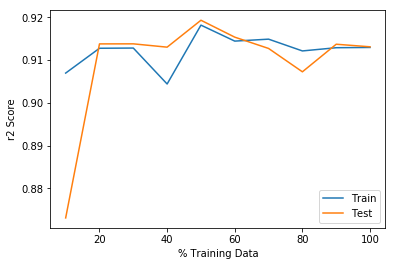

Final train r2 score: 0.9129407544881397
Final test r2 score: 0.9130931258334256


In [18]:
plot_learning_curves(LinearRegression(), X, y)

##### SVM (Support Vector Machine)

In [19]:
# Not a suitable model (Takes too long). But can try with a smaller dataset.
# plot_learning_curves(SVR(C=9e+2, kernel='rbf', gamma=1e-1), X, y)

##### Random Forest Regressor

c:\users\yanhw\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


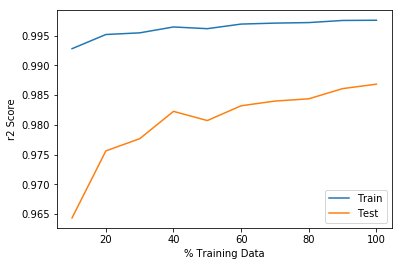

Final train r2 score: 0.9976188133215176
Final test r2 score: 0.9868483833048439


In [20]:
plot_learning_curves(RandomForestRegressor(), X, y)

##### Gradient Boosting Regressor

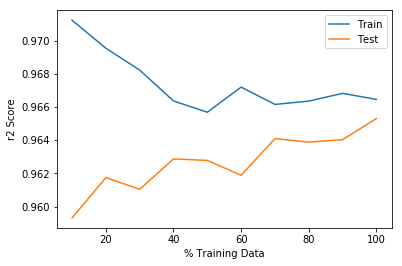

Final train r2 score: 0.9664541265647287
Final test r2 score: 0.9653041281930234


In [21]:
plot_learning_curves(GradientBoostingRegressor(), X, y)